## This is the notebook used to generate the dataset used on the FKLearn Tutorial.ipynb
* The FKLearn Tutorial notebook was used to introduce FKLearn on Nubank's Data Science Meetup and the idea was to give an overall idea on how and why you should use FKLearn

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [3]:
ids = range(0, 10000)
months = range(1, 24)

In [4]:
unique_entries = np.array(np.meshgrid(ids, months)).T.reshape(-1, 2)

In [5]:
unique_entries.shape

(230000, 2)

In [6]:
np.power(np.array([months]), 0.1) 

array([[1.        , 1.07177346, 1.11612317, 1.14869835, 1.17461894,
        1.1962312 , 1.21481404, 1.23114441, 1.24573094, 1.25892541,
        1.27098162, 1.28208885, 1.29239222, 1.30200545, 1.31101942,
        1.31950791, 1.32753167, 1.33514136, 1.34237965, 1.34928285,
        1.35588211, 1.36220437, 1.36827308]])

In [7]:

X = get_truncated_normal(5000, 2000, 300, 20000)
income_by_id = X.rvs(len(ids))
income_by_id = np.repeat(income_by_id, len(months))
income_wrong_entry = np.random.binomial(1, 1 - 0.05, unique_entries.shape[0]).astype(bool)
income_array = np.where(income_wrong_entry == True, income_by_id.reshape(1, -1), 9999999)

In [8]:
income_array.shape

(1, 230000)

(array([8.5100e+02, 2.4150e+03, 3.8180e+03, 5.8880e+03, 9.3610e+03,
        1.2420e+04, 1.6031e+04, 1.9228e+04, 2.1091e+04, 2.3276e+04,
        2.2448e+04, 2.1942e+04, 2.0263e+04, 1.4789e+04, 1.2236e+04,
        9.2230e+03, 5.8420e+03, 3.9100e+03, 2.3230e+03, 1.2880e+03,
        7.3600e+02, 2.7600e+02, 9.2000e+01, 1.8400e+02, 2.3000e+01,
        2.3000e+01, 2.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([    0,   500,  1000,  1500,  2000,  2500,  3000,  3500,  4000,
         4500,  5000,  5500,  6000,  6500,  7000,  7500,  8000,  8500,
         9000,  9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000,
        13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500,
        18000, 18500, 19000, 19500]),
 <a list of 39 Patch objects>)

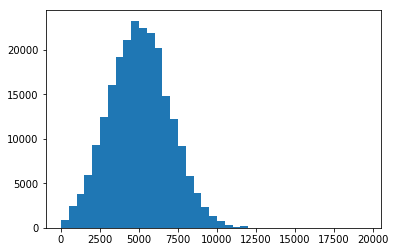

In [9]:
plt.hist(income_by_id, bins = range(0, 20000, 500)) 

In [10]:
customer_creation_date = []
for m_id in np.random.choice(len(months) * 31, len(ids)):
    customer_creation_date.append(np.datetime64("2017-01-01") + np.timedelta64(int(m_id), 'D'))
customer_creation_date = np.repeat(np.array(customer_creation_date), len(months))

In [11]:
phone_branches = ["samsung", "motorola", "iphone", "lg"]
random_phone = np.random.choice(4, len(ids), p=[0.15, 0.3, 0.25, 0.3])
cellphone_branch = [phone_branches[i] for i in random_phone]
cellphone_branch = np.repeat(cellphone_branch, len(months))
phone_factor = [0.7, 0.3, 0.9, 0.45]
cellphone_factor = [phone_factor[i] for i in random_phone]
cellphone_factor = np.repeat(cellphone_factor, len(months))

In [12]:
cellphone_factor

array([0.45, 0.45, 0.45, ..., 0.3 , 0.3 , 0.3 ])

In [13]:
bureau_missing = np.random.binomial(1, 1 - 0.1, unique_entries.shape[0]).astype(bool)
Y = get_truncated_normal(500, 250, 0, 1000)
bureau_score = Y.rvs(unique_entries.shape[0])
monthly_factor = np.tile(np.power(np.array(months), 0.2), len(ids))
bureau_score = np.where(bureau_missing == True, bureau_score, np.nan) / monthly_factor

In [14]:
bureau_score

array([395.94580788, 415.29087644, 159.24609131, ..., 433.25966177,
       297.1819245 ,          nan])

(array([ 2219.,  2924.,  3928.,  4948.,  6192.,  7456.,  8735., 10123.,
        11212., 11909., 12934., 13351., 12961., 12877., 12282., 11558.,
        10431.,  9236.,  8037.,  7139.,  5836.,  4894.,  3652.,  2821.,
         2063.,  1654.,  1256.,  1029.,   817.,   572.,   480.,   375.,
          275.,   240.,   206.,   132.,    78.,    86.,    69.]),
 array([  0,  25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300,
        325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625,
        650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950,
        975]),
 <a list of 39 Patch objects>)

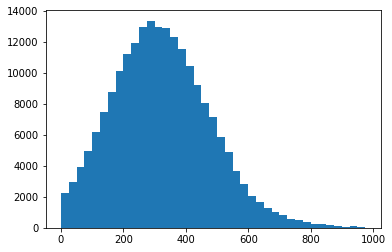

In [15]:
plt.hist(bureau_score, bins = range(0, 1000, 25)) 

In [16]:
willingness_to_spend = np.repeat(np.random.normal(500, 200, len(ids)), len(months))

In [17]:
willingness_to_spend

array([933.87350032, 933.87350032, 933.87350032, ..., 238.32311792,
       238.32311792, 238.32311792])

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.3000e+01, 0.0000e+00,
        2.3000e+01, 4.6000e+01, 2.3000e+02, 4.6000e+02, 6.2100e+02,
        1.1730e+03, 2.4610e+03, 4.1400e+03, 6.0030e+03, 7.9580e+03,
        1.1868e+04, 1.4789e+04, 1.9044e+04, 2.0493e+04, 2.3276e+04,
        2.3184e+04, 2.2379e+04, 1.8860e+04, 1.5571e+04, 1.2167e+04,
        9.5680e+03, 5.9570e+03, 4.3930e+03, 2.2540e+03, 1.4030e+03,
        9.6600e+02, 3.9100e+02, 1.8400e+02, 2.3000e+01, 6.9000e+01,
        0.0000e+00, 2.3000e+01, 0.0000e+00, 0.0000e+00]),
 array([-1000,  -950,  -900,  -850,  -800,  -750,  -700,  -650,  -600,
         -550,  -500,  -450,  -400,  -350,  -300,  -250,  -200,  -150,
         -100,   -50,     0,    50,   100,   150,   200,   250,   300,
          350,   400,   450,   500,   550,   600,   650,   700,   750,
          800,   850,   900,   950,  1000,  10

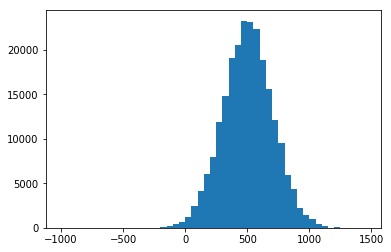

In [18]:
plt.hist(willingness_to_spend, bins = range(-1000, 1500, 50)) 

In [31]:
noise_feature = np.random.normal(1000, 100, unique_entries.shape[0])

In [32]:
a = (willingness_to_spend)
a_norm = (a - a.min()) / (a.max() - a.min())
b = (income_array)
b_norm = (b - b.min()) / (b.max() - b.min())
c = cellphone_factor * willingness_to_spend
c_norm = (c - c.min()) / (c.max() - c.min())
d = (np.where(np.isnan(bureau_score), 300.0, bureau_score))
d_norm = (d - d.min()) / (d.max() - d.min())
# e = np.random.normal(1, 0.3, unique_entries.shape[0])
W = get_truncated_normal(2000, 100, 0, 50000)
spend = (a_norm + b_norm + c_norm + d_norm) * W.rvs(unique_entries.shape[0])

In [21]:
spend

array([[6476.47307951, 4740.97909678, 3348.94742391, ..., 2367.47238387,
        4354.480922  , 3508.97334522]])

In [22]:
spend.shape

(1, 230000)

In [23]:
income_array.shape

(1, 230000)

In [33]:
initial_df = (pd.DataFrame(
    unique_entries, columns=["id", "month"]
).assign(
       income=income_array.T,
       created_at=customer_creation_date.T,
       phone_type=cellphone_branch.T,
       bureau_score=bureau_score.T,
       spend_desire=willingness_to_spend.T,
       random_noise=noise_feature.T,
       monthly_spend=spend.T,
       month_date=lambda df: df.month * 31 + np.datetime64("2017-01-01")
)
.loc[lambda df: df.month_date >= df.created_at])


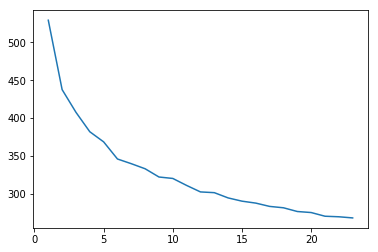

In [34]:
plt.plot(sorted(initial_df.month.unique()), initial_df.groupby("month").agg({"bureau_score": "mean"}))

In [35]:
initial_df

,id,month,income,created_at,phone_type,bureau_score,spend_desire,random_noise,monthly_spend,month_date
10,0,11,2.662664e+03,2017-11-24,lg,NaN,933.873500,1139.988267,3044.984797,2017-12-08
11,0,12,2.662664e+03,2017-11-24,lg,259.050372,933.873500,949.164731,2911.910942,2018-01-08
12,0,13,2.662664e+03,2017-11-24,lg,295.523138,933.873500,829.196293,2867.779678,2018-02-08
13,0,14,2.662664e+03,2017-11-24,lg,260.729691,933.873500,1001.109359,3160.060523,2018-03-11
14,0,15,2.662664e+03,2017-11-24,lg,396.889624,933.873500,997.938315,3420.741792,2018-04-11
15,0,16,2.662664e+03,2017-11-24,lg,78.479225,933.873500,1032.025854,2484.013650,2018-05-12
16,0,17,2.662664e+03,2017-11-24,lg,79.617325,933.873500,969.913448,2454.602869,2018-06-12
17,0,18,2.662664e+03,2017-11-24,lg,177.472256,933.873500,766.796672,2803.507917,2018-07-13
18,0,19,2.662664e+03,2017-11-24,lg,189.046991,933.873500,907.258777,2580.205489,2018-08-13
19,0,20,2.662664e+03,2017-11-24,lg,296.367569,933.873500,1063.450859,3232.765577,2018-09-13


In [36]:
with_target_df = (initial_df.groupby("id", as_index=False).apply(lambda df: df
                                .assign(
                                       avg_last_2_months_spend=lambda x: x.monthly_spend.rolling(2).mean(),
                                       target=lambda x: x.avg_last_2_months_spend.shift(-2)))
                 .reset_index(drop=True))

In [37]:
with_target_df

,id,month,income,created_at,phone_type,bureau_score,spend_desire,random_noise,monthly_spend,month_date,avg_last_2_months_spend,target
0,0,11,2.662664e+03,2017-11-24,lg,NaN,933.873500,1139.988267,3044.984797,2017-12-08,NaN,2889.845310
1,0,12,2.662664e+03,2017-11-24,lg,259.050372,933.873500,949.164731,2911.910942,2018-01-08,2978.447870,3013.920100
2,0,13,2.662664e+03,2017-11-24,lg,295.523138,933.873500,829.196293,2867.779678,2018-02-08,2889.845310,3290.401158
3,0,14,2.662664e+03,2017-11-24,lg,260.729691,933.873500,1001.109359,3160.060523,2018-03-11,3013.920100,2952.377721
4,0,15,2.662664e+03,2017-11-24,lg,396.889624,933.873500,997.938315,3420.741792,2018-04-11,3290.401158,2469.308259
5,0,16,2.662664e+03,2017-11-24,lg,78.479225,933.873500,1032.025854,2484.013650,2018-05-12,2952.377721,2629.055393
6,0,17,2.662664e+03,2017-11-24,lg,79.617325,933.873500,969.913448,2454.602869,2018-06-12,2469.308259,2691.856703
7,0,18,2.662664e+03,2017-11-24,lg,177.472256,933.873500,766.796672,2803.507917,2018-07-13,2629.055393,2906.485533
8,0,19,2.662664e+03,2017-11-24,lg,189.046991,933.873500,907.258777,2580.205489,2018-08-13,2691.856703,2977.553448
9,0,20,2.662664e+03,2017-11-24,lg,296.367569,933.873500,1063.450859,3232.765577,2018-09-13,2906.485533,2528.613270


In [38]:
with_target_df.to_csv("fklearn-tutorial-input-dataset-v2.csv", index=False)